In [1]:
import sys
sys.path.append("../../BayesFlow")
sys.path.append("../")

import os
if "KERAS_BACKEND" not in os.environ:
    # set this to "torch", "tensorflow", or "jax"
    os.environ["KERAS_BACKEND"] = "torch"

import numpy as np
import pickle

import keras
import seaborn as sns

import matplotlib.pyplot as plt


parent_dir = '/home/administrator/Documents/bf_dmc'



In [2]:
import bayesflow as bf
from dmc import DMC, dmc_helpers

os.getcwd()

with torch.enable_grad():
in contexts where you need gradients (e.g. custom training loops).


'/home/administrator/Documents/bf_dmc/playgrounds'

In [8]:
import pandas as pd

narrow_data = pd.read_csv('../data/empirical_data/experiment_data_narrow.csv')
wide_data = pd.read_csv('../data/empirical_data/experiment_data_wide.csv')

empirical_data = pd.concat([narrow_data, wide_data])

empirical_data

,participant,rt,accuracy,congruency_num,spacing_num
0,275,0.453,1,0,1
1,275,0.444,1,0,1
2,275,0.380,1,0,1
3,275,0.384,1,1,1
4,275,0.494,1,0,1
...,...,...,...,...,...
25290,985,0.344,1,0,0
25291,985,0.496,0,1,0
25292,985,0.483,1,0,0
25293,985,0.541,1,1,0


In [31]:
df = pd.DataFrame(empirical_data.groupby(['participant', 'congruency_num', 'spacing_num']).mean('rt')).reset_index()
df

,participant,congruency_num,spacing_num,rt,accuracy
0,275,0,0,0.445717,0.989529
1,275,0,1,0.439702,0.980488
2,275,1,0,0.442616,0.989189
3,275,1,1,0.476679,0.958549
4,808,0,0,0.472685,0.973684
...,...,...,...,...,...
263,161753,1,1,0.465737,0.924731
264,337788,0,0,0.451374,0.994737
265,337788,0,1,0.446773,1.000000
266,337788,1,0,0.457503,0.984293


In [37]:
df_wide = df.pivot(index=['participant', 'spacing_num'], columns='congruency_num', values='rt').reset_index()

In [43]:
n_parts = df_wide['participant'].unique().shape[0]

In [44]:
n_parts

67

In [45]:
df_wide

congruency_num,participant,spacing_num,0,1
0,275,0,0.445717,0.442616
1,275,1,0.439702,0.476679
2,808,0,0.472685,0.475811
3,808,1,0.471177,0.474617
4,833,0,0.457504,0.463627
...,...,...,...,...
129,8788,1,0.407935,0.442078
130,161753,0,0.428642,0.440654
131,161753,1,0.430389,0.465737
132,337788,0,0.451374,0.457503


In [46]:
df

,participant,congruency_num,spacing_num,rt,accuracy
0,275,0,0,0.445717,0.989529
1,275,0,1,0.439702,0.980488
2,275,1,0,0.442616,0.989189
3,275,1,1,0.476679,0.958549
4,808,0,0,0.472685,0.973684
...,...,...,...,...,...
263,161753,1,1,0.465737,0.924731
264,337788,0,0,0.451374,0.994737
265,337788,0,1,0.446773,1.000000
266,337788,1,0,0.457503,0.984293


In [55]:
parts = df['participant'].unique()

/tmp/ipykernel_21852/2949616836.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


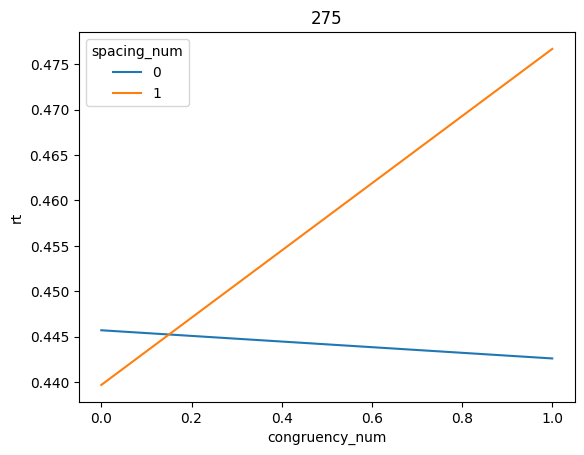

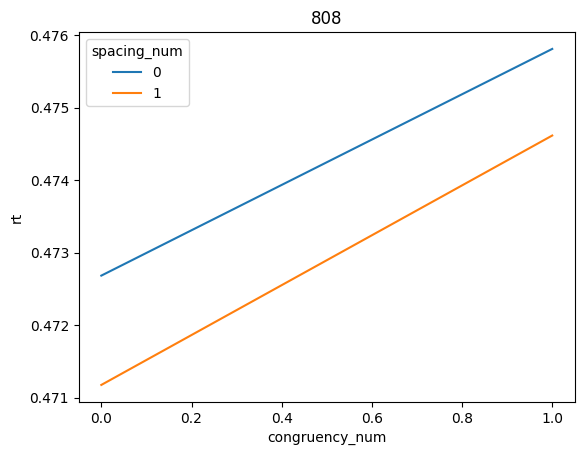

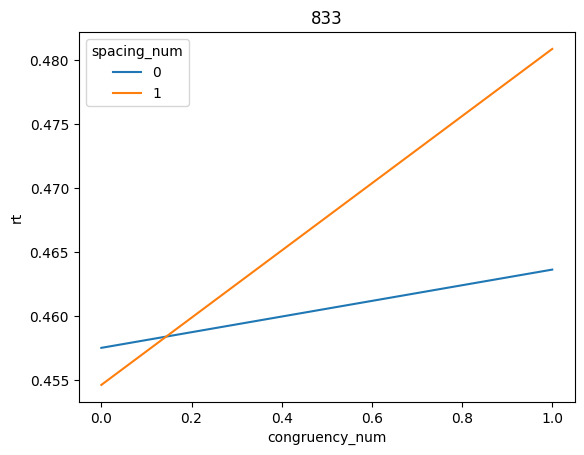

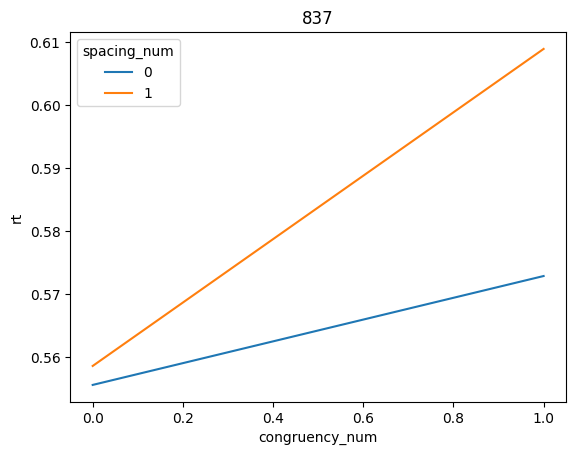

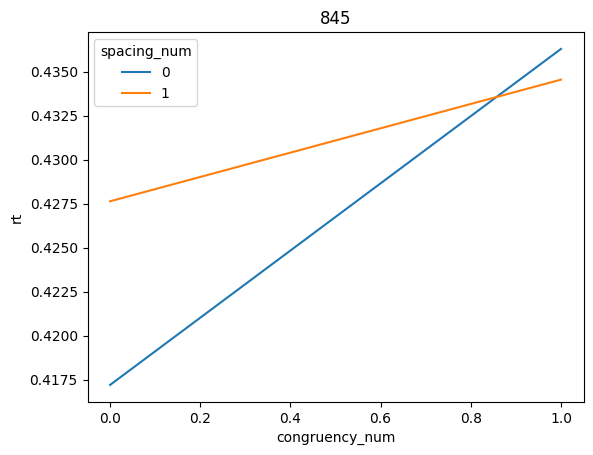

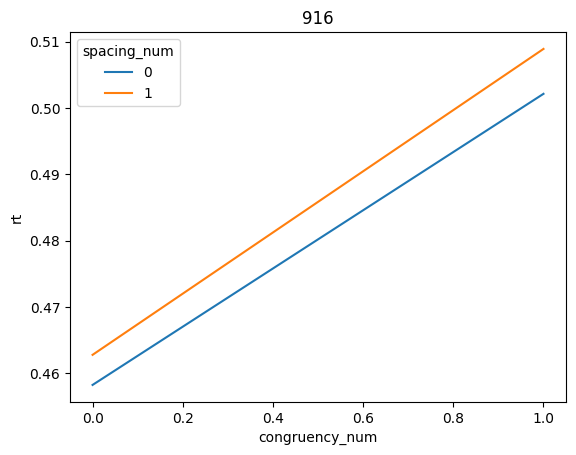

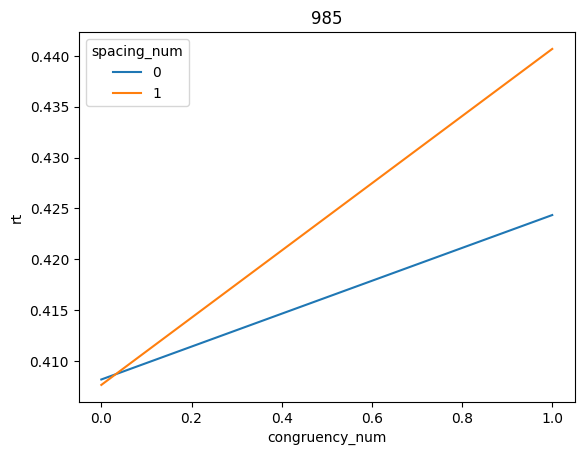

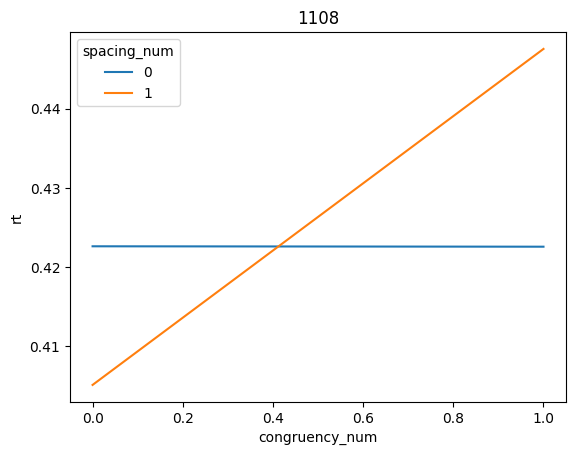

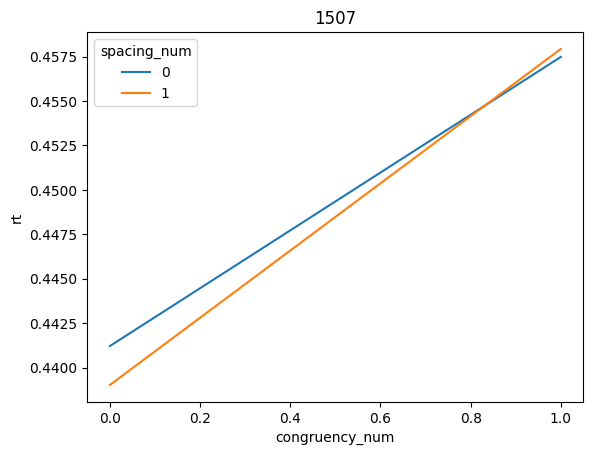

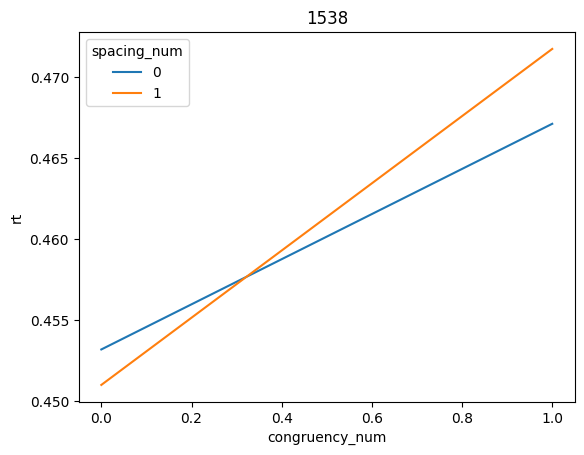

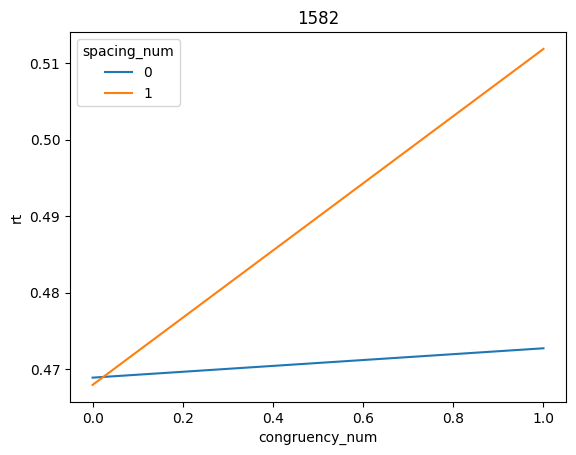

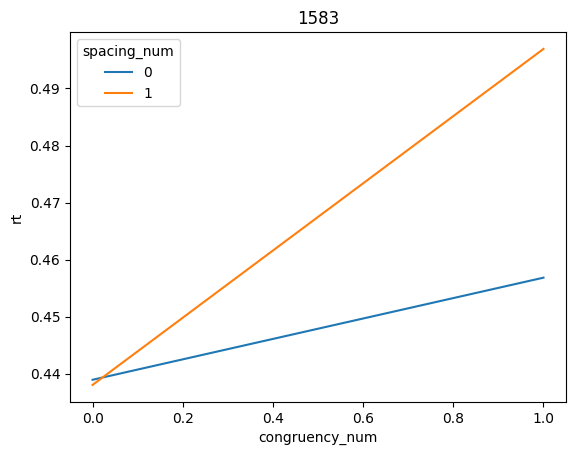

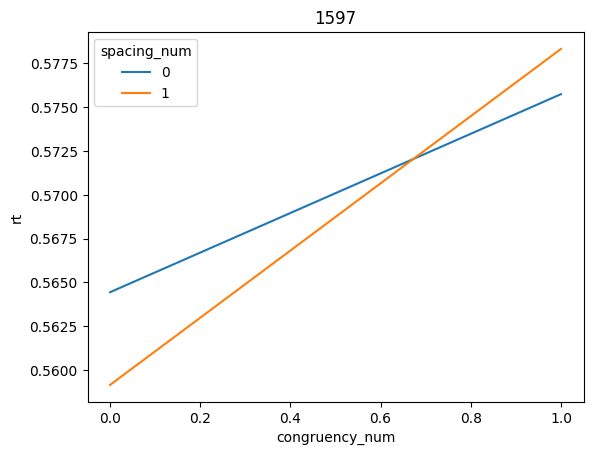

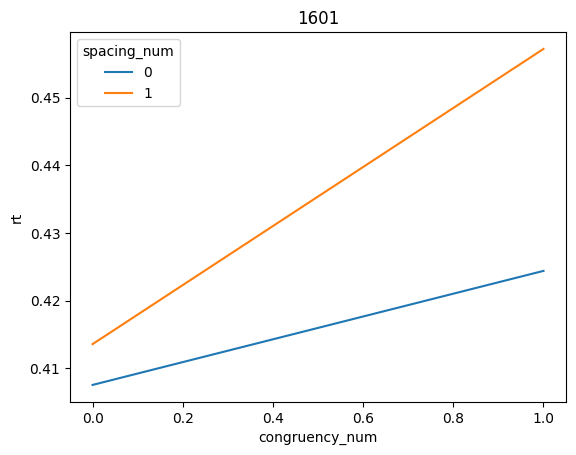

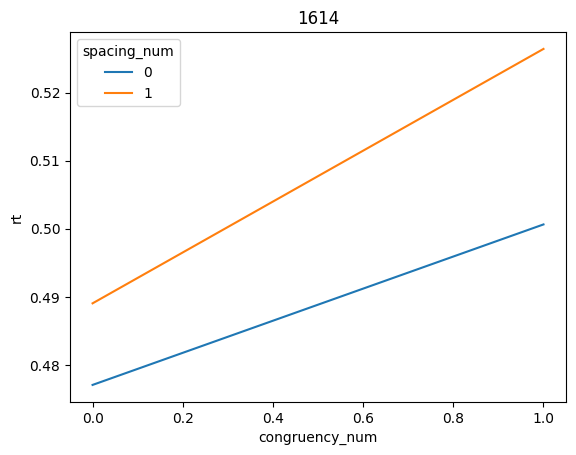

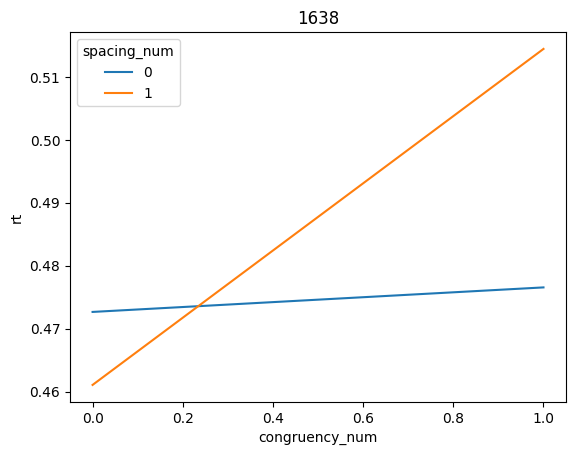

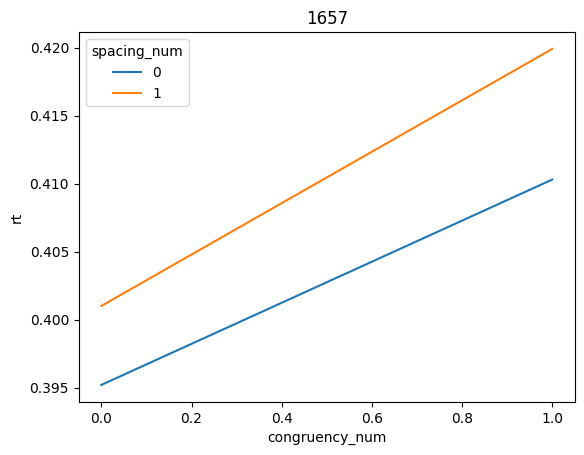

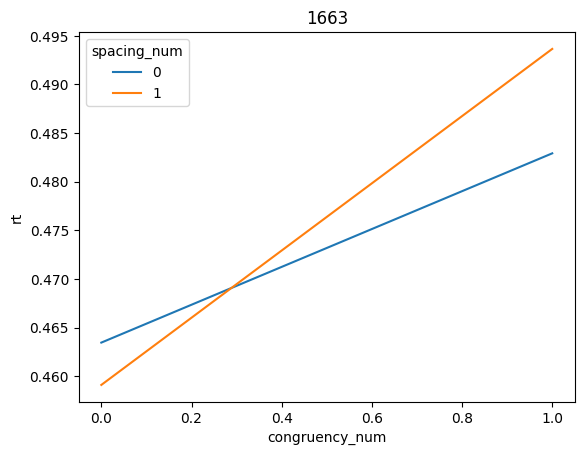

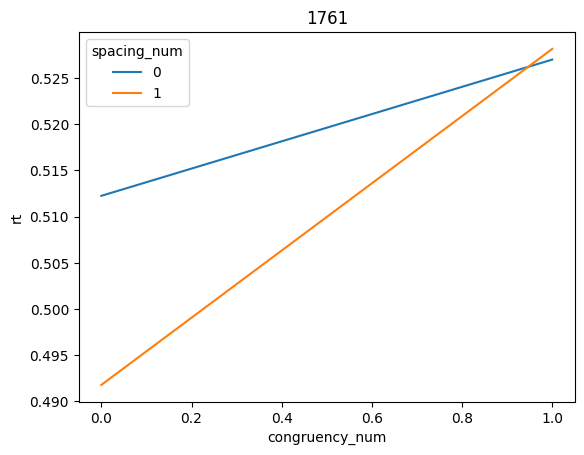

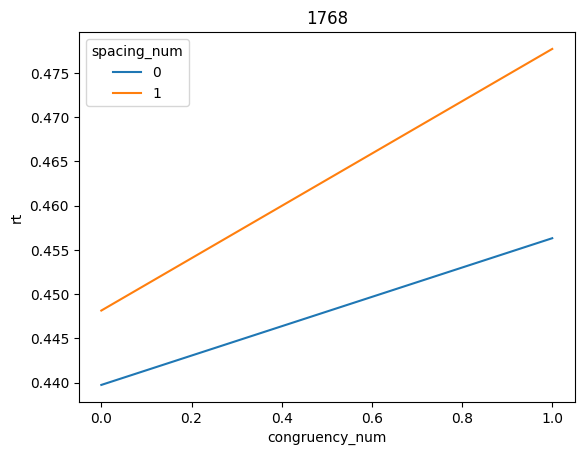

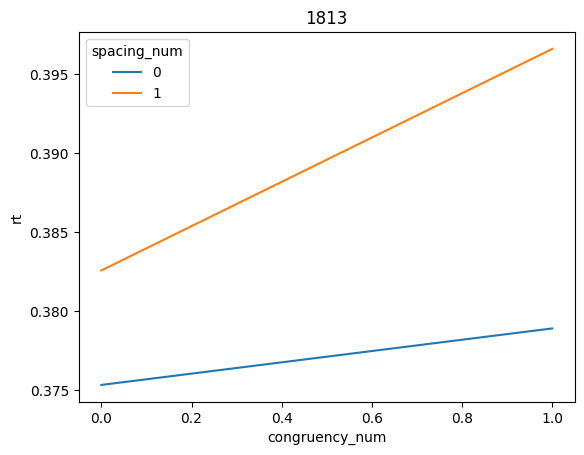

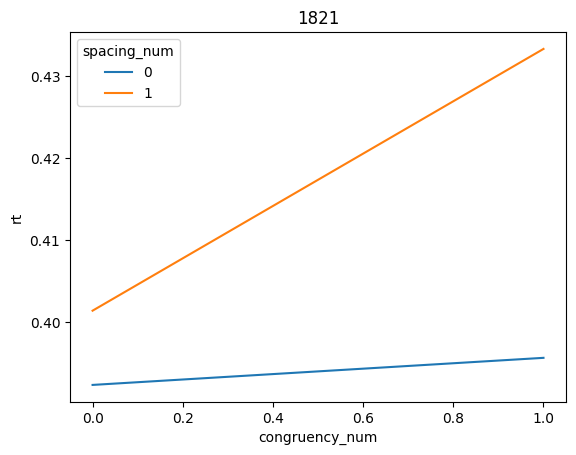

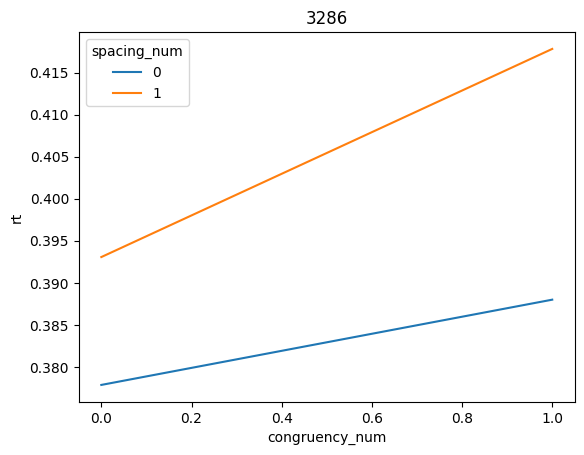

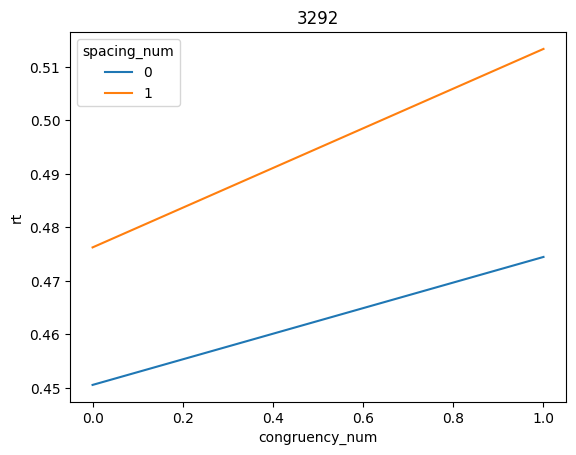

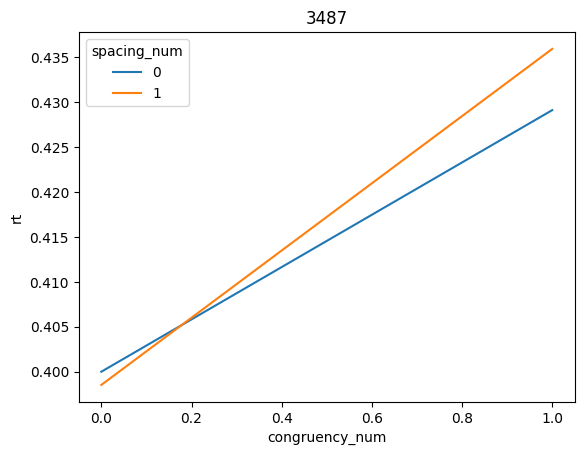

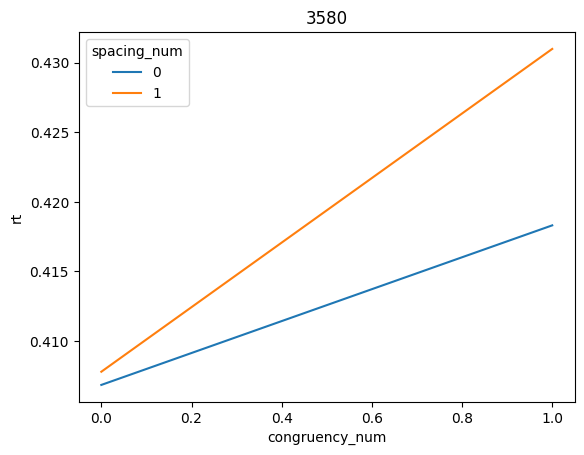

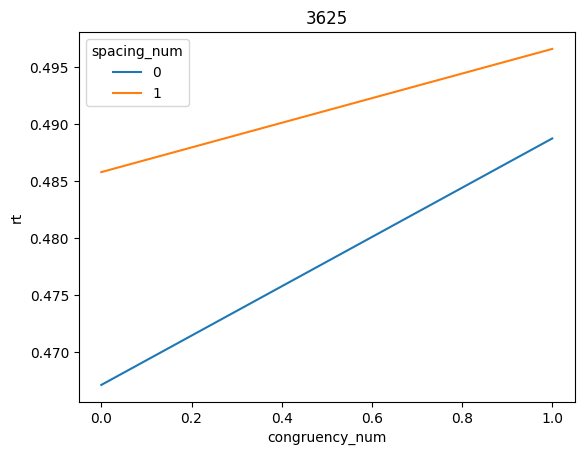

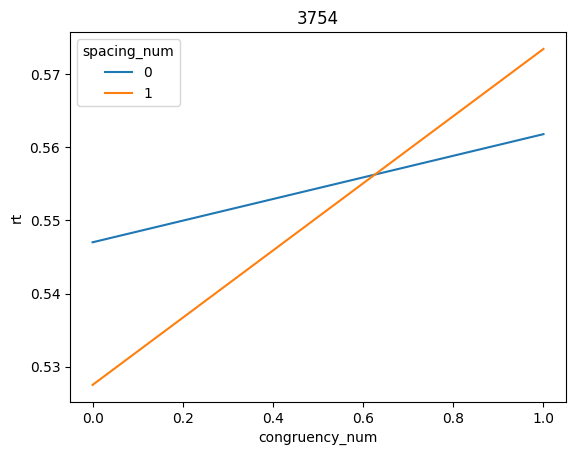

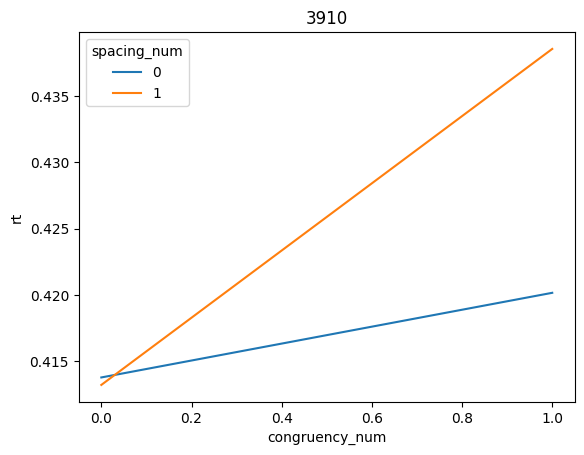

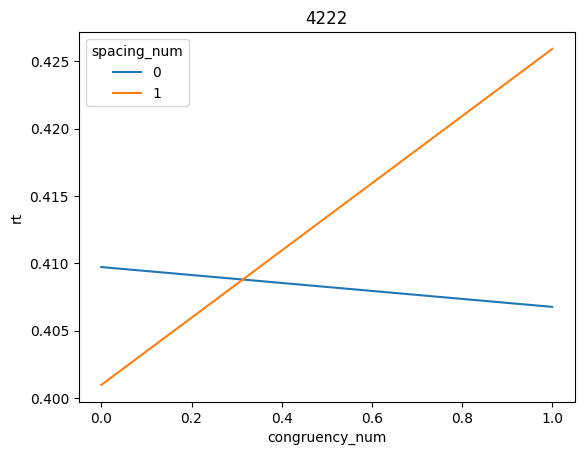

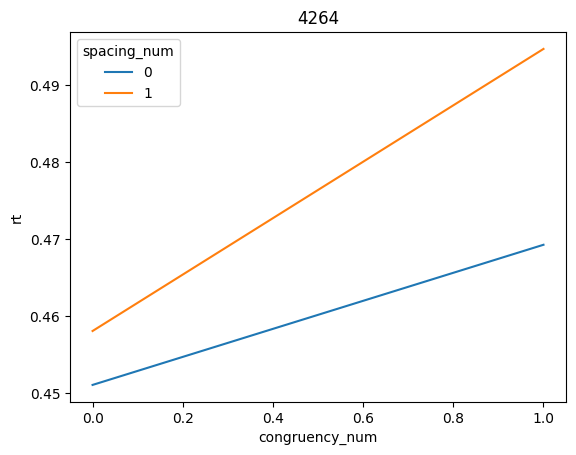

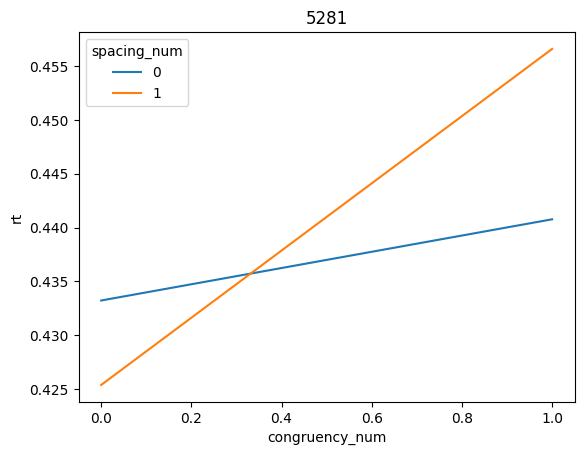

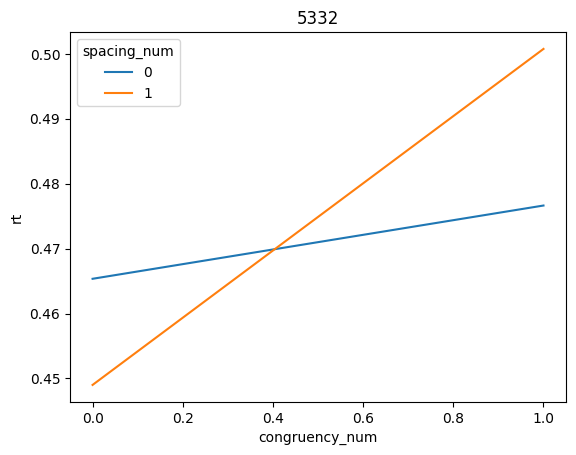

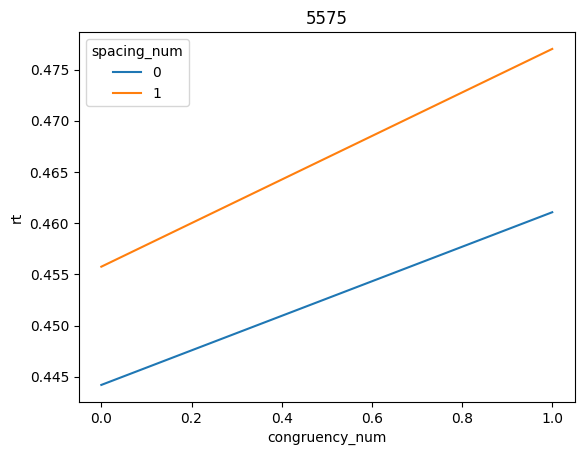

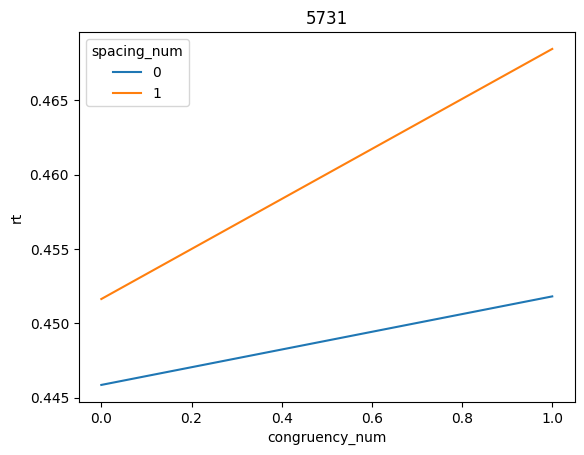

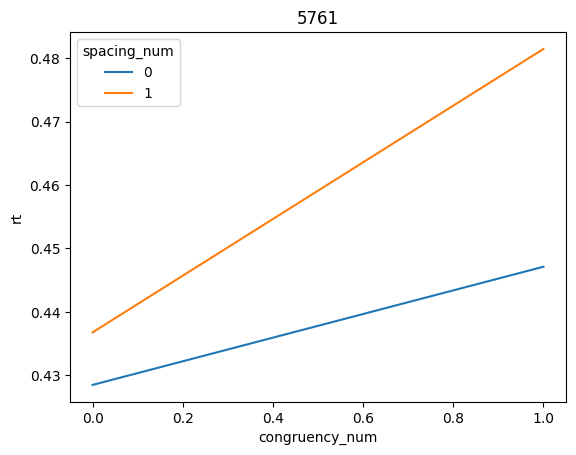

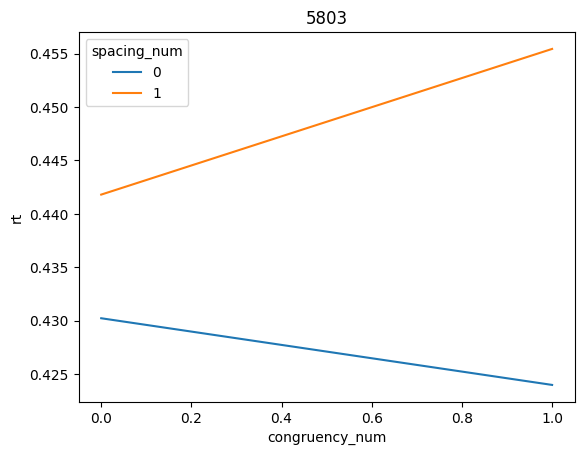

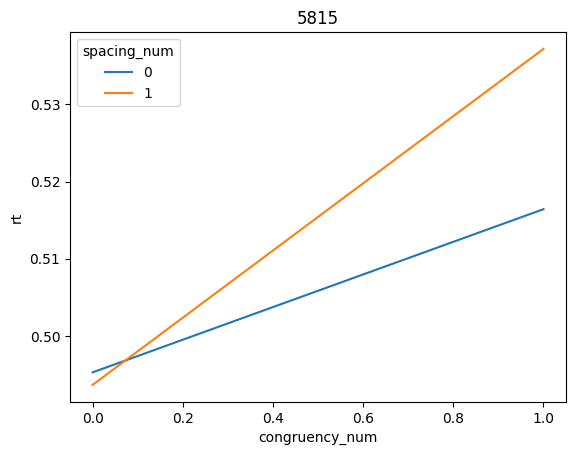

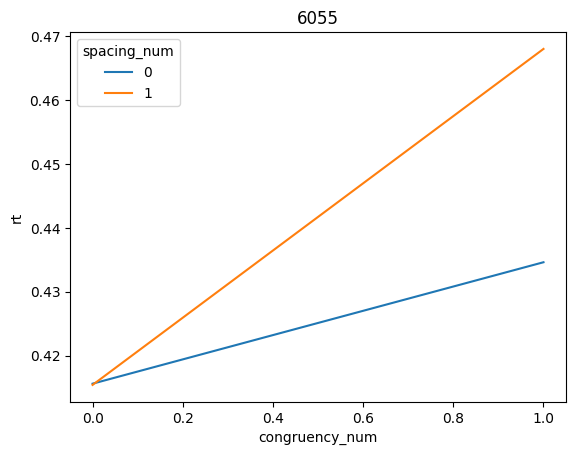

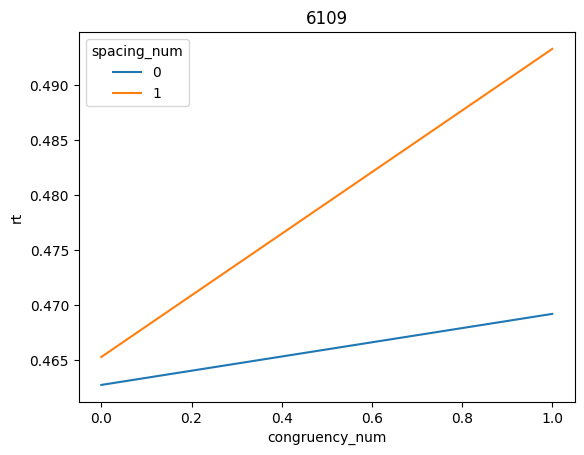

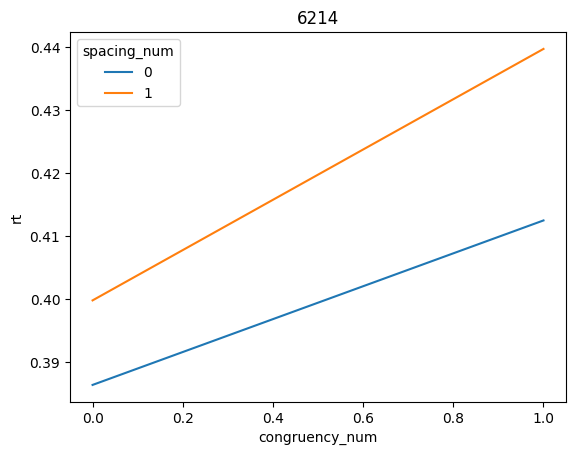

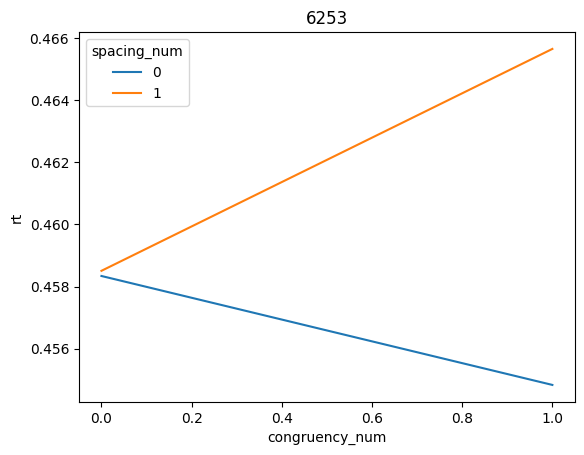

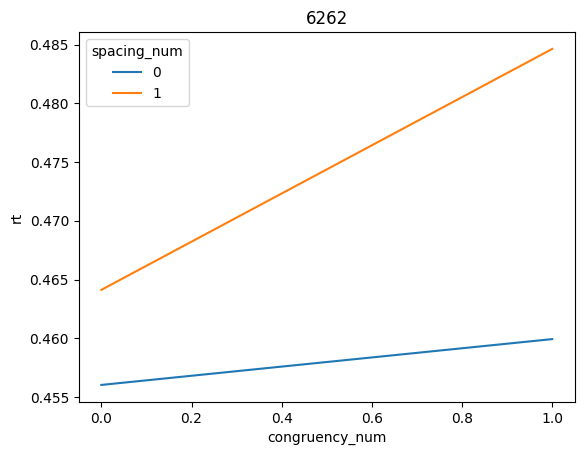

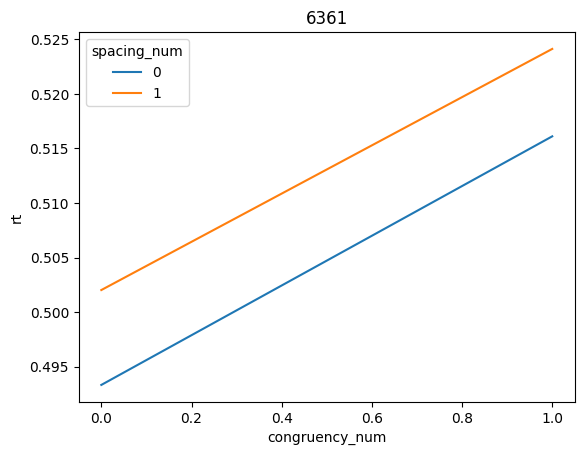

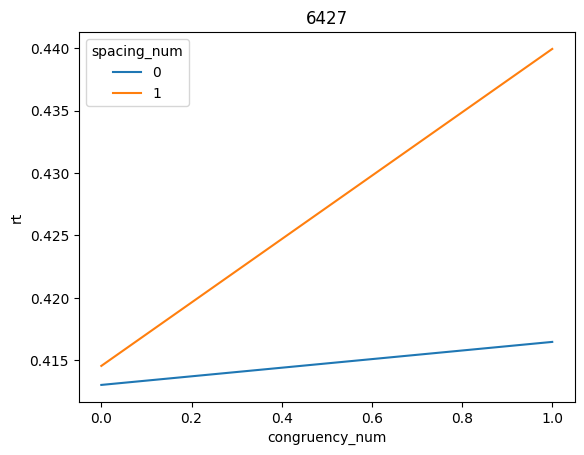

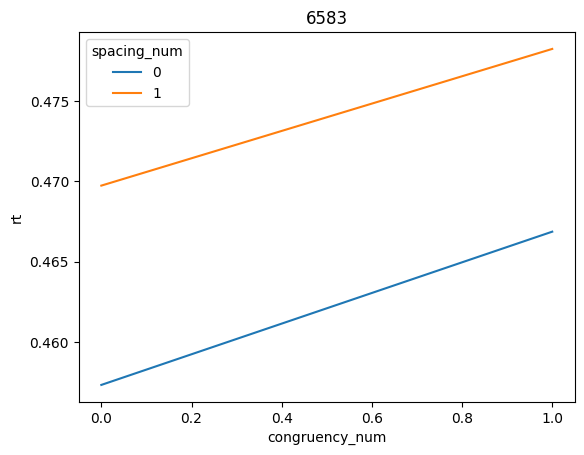

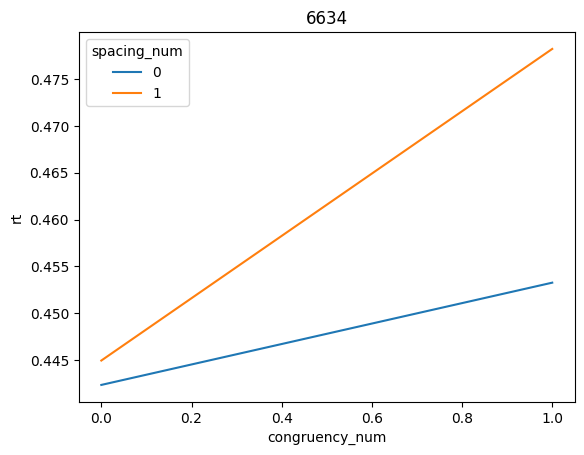

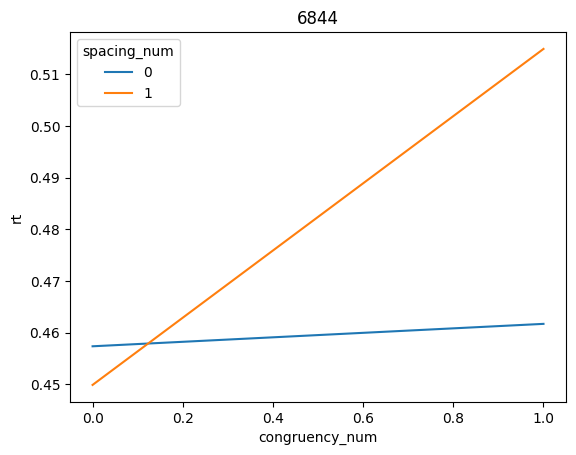

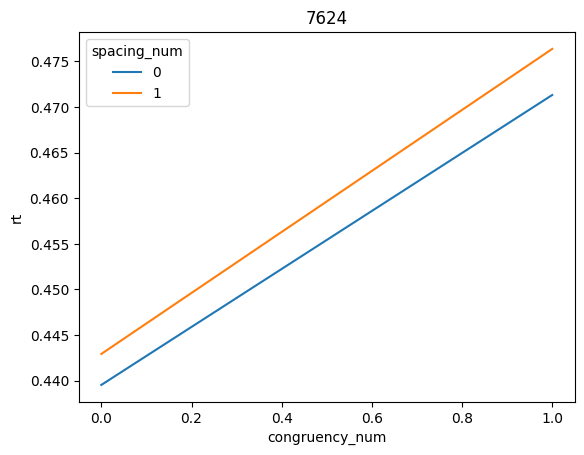

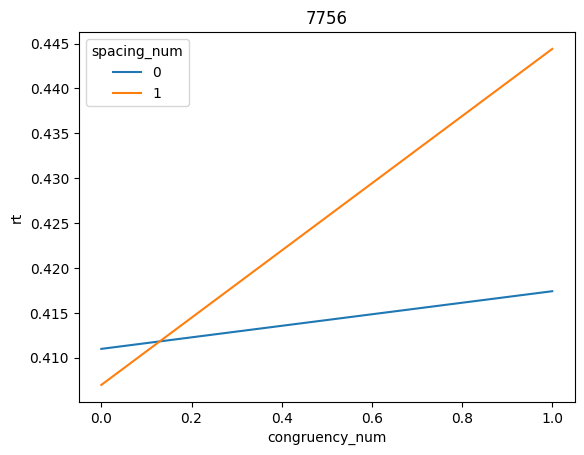

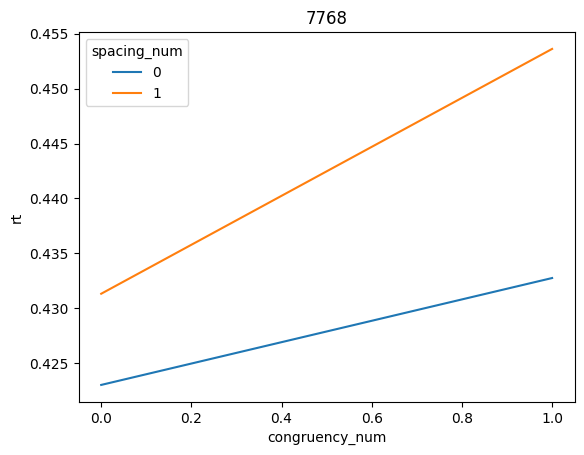

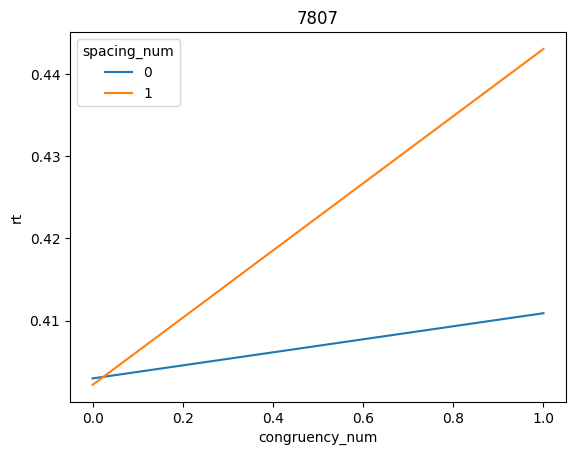

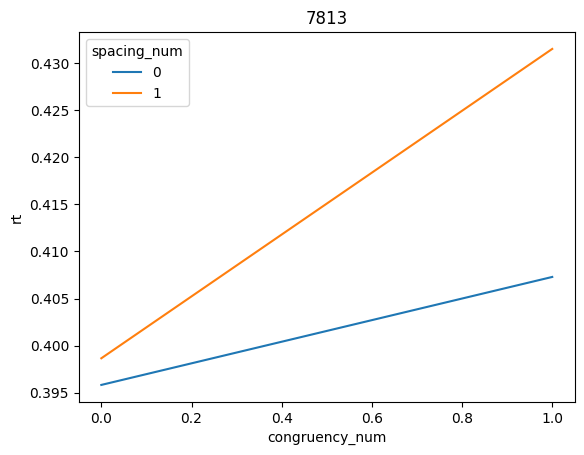

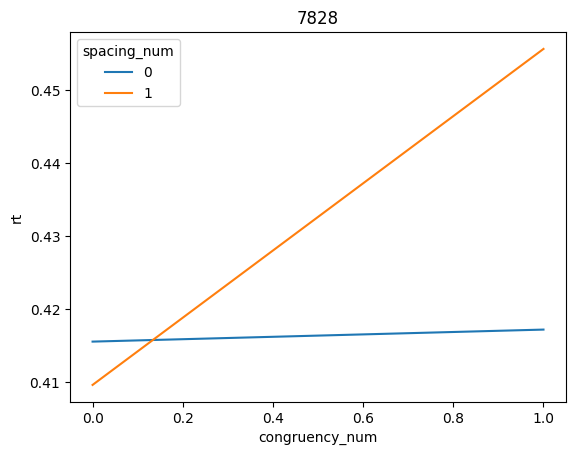

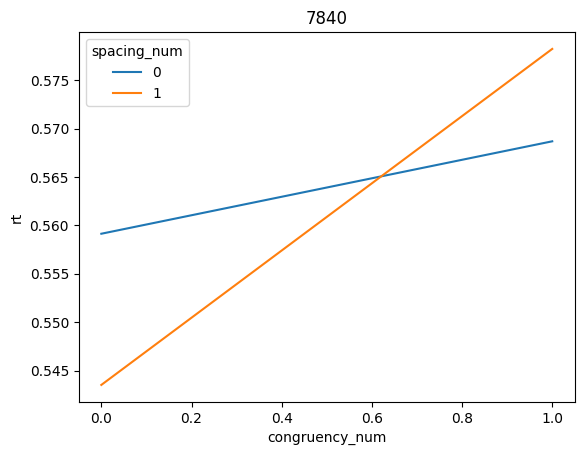

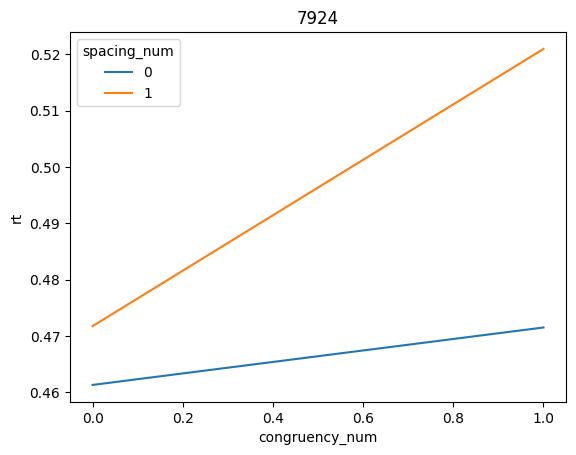

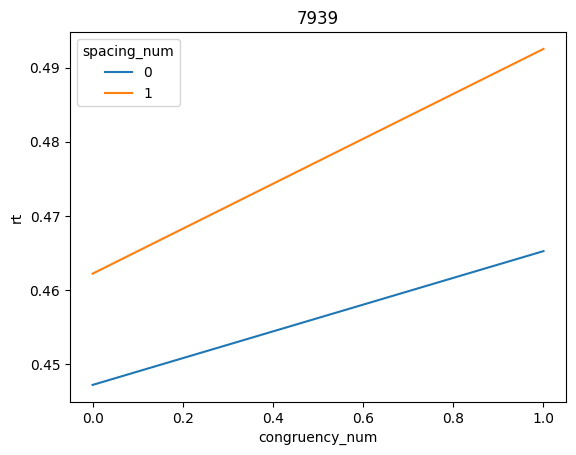

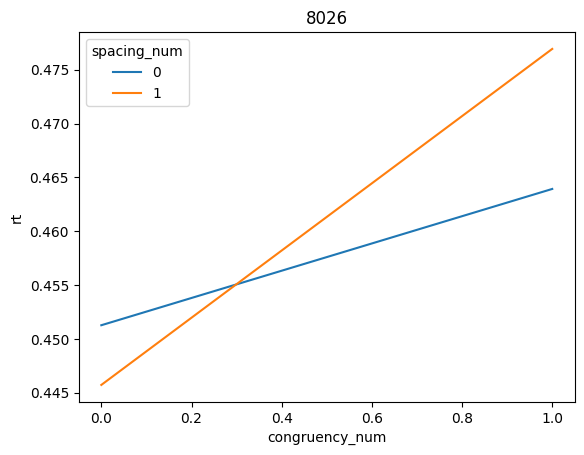

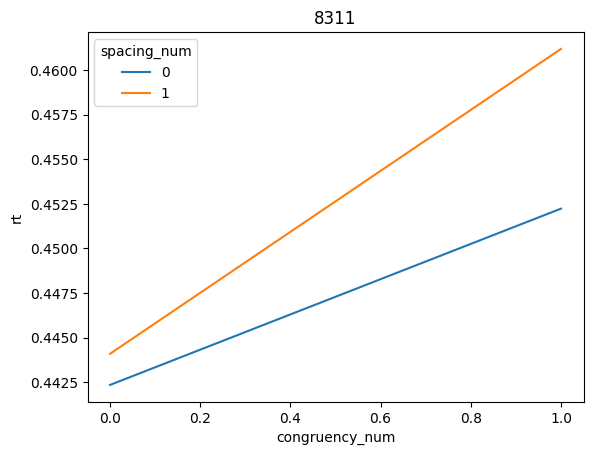

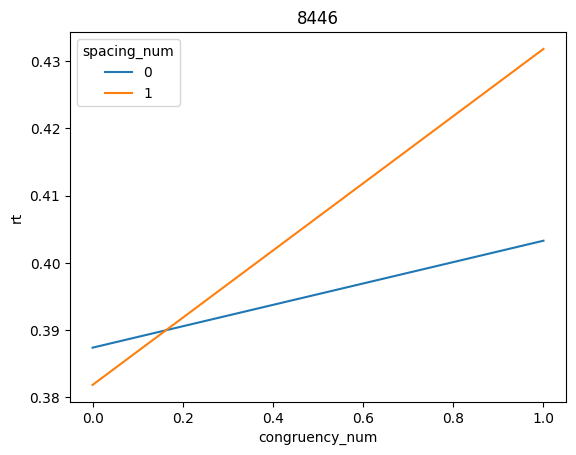

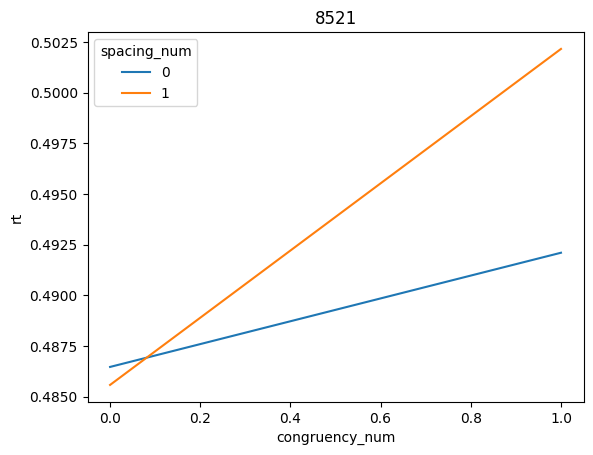

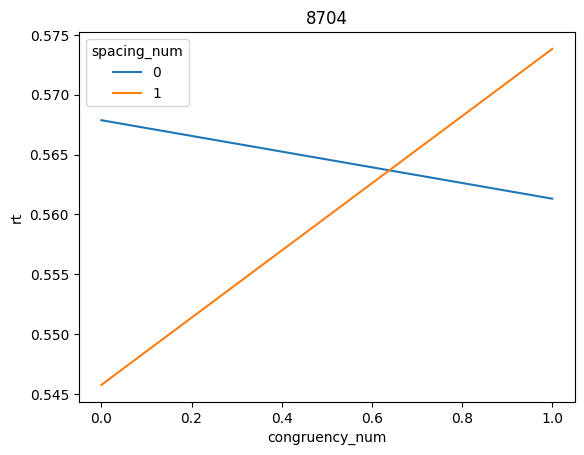

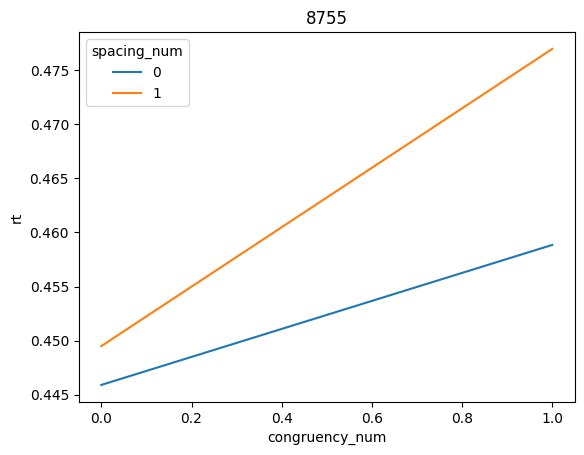

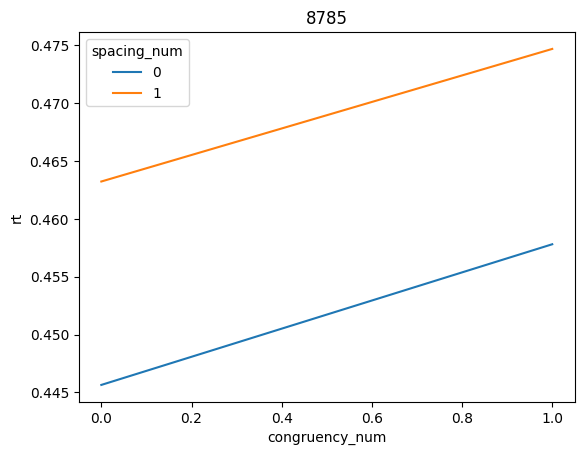

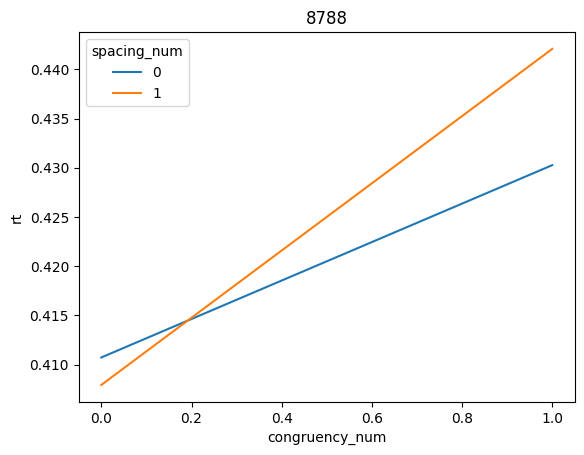

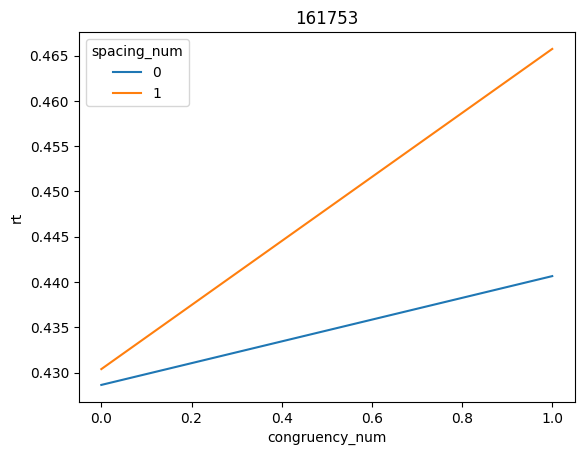

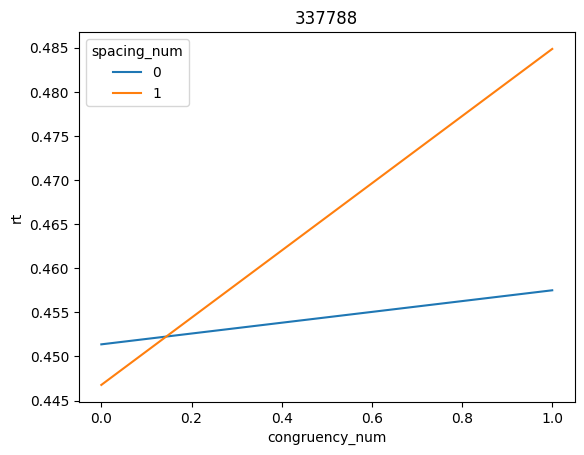

In [57]:
import seaborn as sns


for part in parts:
    df_plot = df[df['participant'] == part]
    plt.figure()    
    sns.lineplot(data = df_plot, x='congruency_num', y='rt', hue='spacing_num')
    plt.title(str(part))